In [196]:
!pip install nltk

In [15]:
%matplotlib inline

In [2]:
import tweepy
from vaderSentiment.vaderSentiment import sentiment as sentiment

In [3]:
from nltk import sentiment as sn

In [4]:
import numpy as np

In [5]:
import json

In [6]:
import time

In [7]:
import matplotlib.pyplot as plt

In [8]:
import re

In [9]:
ACCESS_TOKEN = '2245810146-os7gvZ3pRNg841BPCp0owl0UoAxNfpKWxmcN2VJ'
ACCESS_SECRET = 'tiuJmQqzjr0SoybM8WihIewkqACxTCX8hXwFpjoYMPGSC'
CONSUMER_KEY = '8pd19OaqgxaF7sjISdWuYoXQi'
CONSUMER_SECRET = 'tYcaTHMYYPtgMaFKCVPWddVUVgakQQvyRYQN4WLXZnCDb8gDsl'

In [10]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

api = tweepy.API(auth)

#what queries? 
tweets = api.search(q='#MakeStuffBetter', result_type='recent', lang='en', count=2000)
#happy tweets q=':)'

In [11]:
def topNTweets(tweets, n, posThresh):
    posScores = np.zeros(len(tweets)+1)
    negScores = np.zeros(len(tweets)+1)
    tweetTxt = [0]*(len(tweets)+1)
    i = 0
    
    for t in tweets:
        posScores[i] = sentiment(tweets[i].id.encode("utf-8"))['pos']
        negScores[i] = sentiment(tweets[i].id.encode("utf-8"))['neg']
        tweetTxt[i] = tweets[i].id
        i += 1
    
    posScores = posScores[posScores>posThresh]
    negScores = negScores[negScores<0.2]

    topNIndices = np.argsort(posScores)[::-1][:n]
#    topNIndices = np.argsort(negScores)[0:n-1]
    
    topN = np.array(tweetTxt)[topNIndices]
    
    return topN

#want URLs of tweets as well 

In [12]:
topNTweets(tweets,5,0.2)

array([ u"@MakeHuman Hey, I'm at #makeStuffBetter and I want to use your tools. Can i get a dev to reply back to me? Have a few questions :-)",
       u'Beer and a collaborative Spotify playlist. What could possibly go wrong\u2026!? @IntertechLGBT #makestuffbetter',
       u"Being well fed (and hydrated ;)) at @IntertechLGBT hackathon. This is all my food, and I've eaten half already..\u2026 https://t.co/JDKjfES23f",
       u'@christopherward and @LiudasSurvila hard at work, while I just sit around taking photos... #makestuffbetter https://t.co/lCagGSG6pH',
       u'Team @positweetapp hard at work @IntertechLGBT #makestuffbetter https://t.co/ftLdGJorzE'], 
      dtype='<U140')

## Metrics

In [13]:
def averageScore(listOfTweets):
    #Receives a list of tweets and returns the average sentiment for each
    averages = {'pos': 0, 'neu': 0, 'neg': 0}
    
    for tweet in listOfTweets:
        sent = sentiment(tweet.text.encode("utf-8"))
        averages['pos'] += sent['pos']
        averages['neu'] += sent['neu']
        averages['neg'] += sent['neg']
    
    averages['pos'] /= len(listOfTweets)
    averages['neu'] /= len(listOfTweets)
    averages['neg'] /= len(listOfTweets)
    
    pos_norm = averages['pos']/(averages['pos']+averages['neg'])
    neg_norm = averages['neg']/(averages['pos']+averages['neg'])
    
    result = [pos_norm, neg_norm]
    
    return result


In [21]:
NTweets = 50

NCalls = 10
score = [0]*NCalls

for call in range(NCalls): #query for most recent NTweets to see positivity progression
    myTLtweets = api.home_timeline(count=NTweets)
    score[call] = averageScore(myTLtweets)
    time.sleep(120) #1 min

In [ ]:
def updateScore(NTweets):
    myTLtweets = api.home_timeline(count=NTweets)
    return np.array(averageScore(myTLtweets))
    
score[i] = updateScore(50) #iteration on plot..? 


In [282]:
#test = myTLtweets[5]
#test.entities['hashtags'][0]['text']

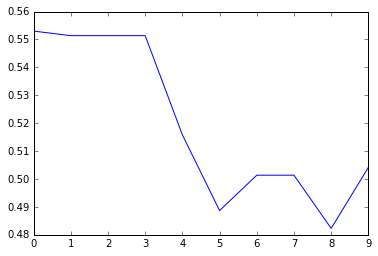

In [83]:
plt.plot(np.array(score)[:,0]) #plot positive tweets over time
plt.show()

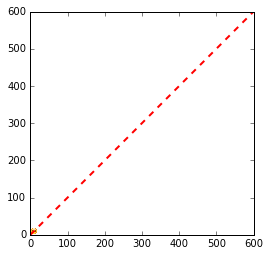

In [43]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

happy = plt.imread('http://pix.iemoji.com/images/emoji/apple/ios-9/256/smiling-face-with-smiling-eyes.png')
plt.imshow(happy, extent=[10,20,10,20])

sad = plt.imread('http://pix.iemoji.com/images/emoji/apple/ios-9/256/pensive-face.png')
plt.imshow(sad, extent=[1,20,1,20])

coords = [0, 100, 200, 300, 400, 500, 600] 

plt.plot(coords, coords, 'r--', linewidth=2)
plt.show()

In [ ]:
#api.retweet(tweets[ind].id) #retweet positive tweets to Positweet app twitter account
#instead posting to colleciton 

In [44]:
tweets[0].id

794980297213349892

In [80]:
ACCESS_TOKEN = '794958619582271488-2spfUNOyGDRDwDhcXLDhVhdsmTYi62C'
ACCESS_SECRET = 'wtkxlK3p8XozzphxnXfVbdVNGo93GKonlxpgc0DtweS54'
CONSUMER_KEY = 'FbYQVjSHNBUmv3si3rAqCWstL'
CONSUMER_SECRET = 'cr13tsfTRFT8DOeedhPI5tN0mdaXLI8kUEpuMVWbFxogC0nVZN'

#update collection
import requests
from json import JSONEncoder
from requests_oauthlib import OAuth1

auth1 = OAuth1(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_SECRET)

def saveTweetsToCollection(listOfTweets):
    post = []
    for tweet in listOfTweets:
        post.append({"op":"add", "tweet_id":tweet.id})
    
    json_data = {"id":"custom-795032543540158464", "changes":post}
    #json_data = {"id":"custom-795032543540158464","changes":[{"op":"add","tweet_id":"795020222231089152"}]}
    
    r = requests.post('https://api.twitter.com/1.1/collections/entries/curate.json', json=json_data, auth=auth1)
    
    print json.dumps(json_data)
    print r.text
    print r.json
    

In [81]:
tweets = api.search(q = '#makestuffbetter', result_type='recent', lang='en', count=3)

In [82]:
saveTweetsToCollection(tweets)

In [86]:
print(np.random.rand(100,1))